# Transfer from walking to other tasks

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from scipy.stats import ranksums
%matplotlib inline

In [7]:
tasks = ["BridgeWalker-v0", "CustomCarrier-v0", "PlatformJumper-v0", "CaveCrawler-v0"
         ]

In [8]:
evo_dfs = []
sampling = "all"
for task in tasks:
    processed_task = task.replace("-v0", "").lower()
    for seed in range(10):
        try:
            tmp_df = pd.read_csv(f"../results/me_nn/evo-body-10x10-{processed_task}-{sampling}_{seed}.csv")
            tmp_df["seed"] = seed
            tmp_df["task"] = task
            tmp_df["sampling"] = "evo_me"  # sampling
            tmp_df["repertoire"] = "all"
            evo_dfs.append(tmp_df)
        except FileNotFoundError:
            print("me", task, seed)

        try:
            tmp_df = pd.read_csv(f"../results/ga/evo-body-nn-10x10-{processed_task}_{seed}.csv")
            tmp_df["seed"] = seed
            tmp_df["task"] = task
            tmp_df["sampling"] = "evo_ga"  # sampling
            tmp_df["repertoire"] = "all"
            evo_dfs.append(tmp_df)
        except FileNotFoundError:
            print("ga", task, seed)
evo_df = pd.concat(evo_dfs, ignore_index=True)
evo_df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,seed,task,sampling,repertoire
0,1,0.681694,4.225033,-0.387552,-6.281832,1.562500,6.250000,2.636719,16.380267,2024-08-19 20:14:12.426905,0.0,0,BridgeWalker-v0,evo_me,all
1,2,0.681694,5.369740,2.782071,-7.646553,1.855469,8.105469,2.929688,10.440523,2024-08-19 20:14:22.867780,0.0,0,BridgeWalker-v0,evo_me,all
2,3,0.681694,5.178824,4.072862,-6.995504,2.539062,9.667969,3.222656,10.706196,2024-08-19 20:14:33.574619,0.0,0,BridgeWalker-v0,evo_me,all
3,4,0.681694,9.032340,5.683662,-9.269070,2.636719,11.230469,3.515625,10.464264,2024-08-19 20:14:44.039351,0.0,0,BridgeWalker-v0,evo_me,all
4,5,0.681694,9.951715,9.441121,-14.000927,2.636719,11.816406,4.101562,10.770119,2024-08-19 20:14:54.809930,0.0,0,BridgeWalker-v0,evo_me,all


## Processing time

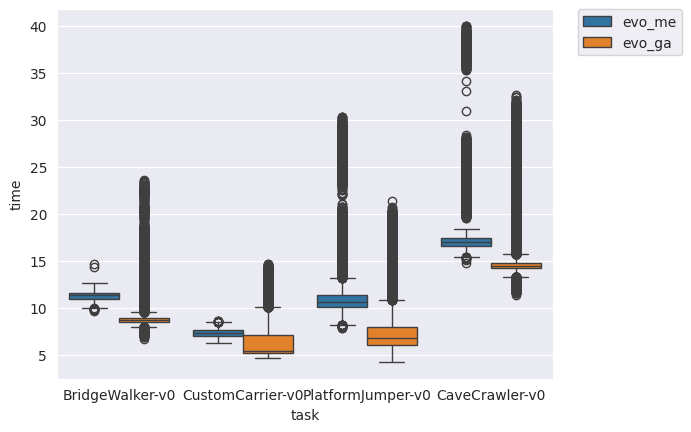

In [9]:
sns.boxplot(
    evo_df[evo_df["iteration"] > 5],
    x="task",
    y="time",
    hue="sampling",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Evolution results

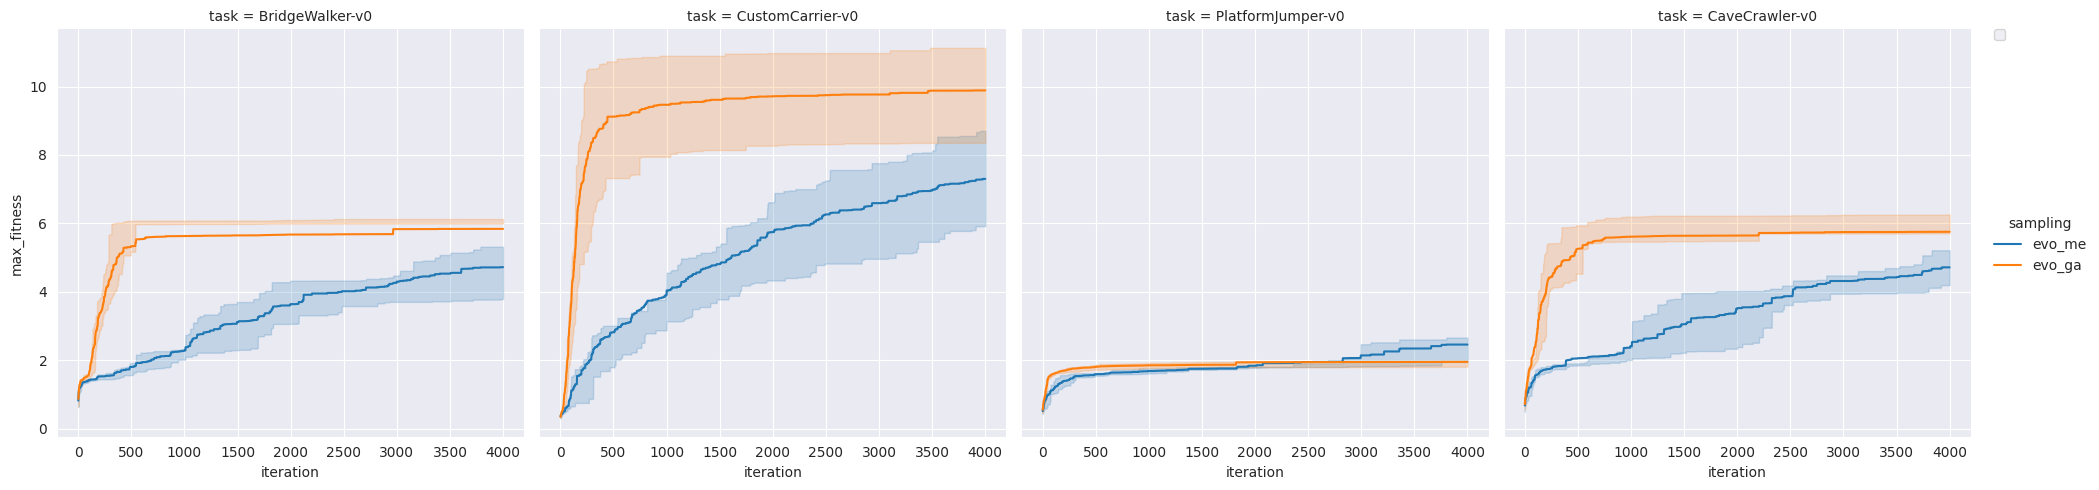

In [10]:
sns.relplot(
    data=evo_df, x="iteration", y="max_fitness", col="task",
    hue="sampling", kind="line", errorbar=("pi", 50),
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()

In [11]:
final_evo_df = evo_df[evo_df["iteration"] == max(evo_df["iteration"])][
    ["max_fitness", "coverage1", "coverage2", "coverage3", "task", "seed", "sampling", "repertoire"]]
final_evo_df.head()

,max_fitness,coverage1,coverage2,coverage3,task,seed,sampling,repertoire
3999,3.712342,11.425781,55.17578,27.539062,BridgeWalker-v0,0,evo_me,all
7999,6.305940,NaN,NaN,NaN,BridgeWalker-v0,0,evo_ga,all
11999,6.329406,11.328125,58.59375,35.839844,BridgeWalker-v0,1,evo_me,all
15999,6.185040,NaN,NaN,NaN,BridgeWalker-v0,1,evo_ga,all
19999,6.582234,11.523438,57.03125,22.851562,BridgeWalker-v0,2,evo_me,all


## Task transfer results

In [12]:
dfs = [final_evo_df]
samplings = ["all", "s1", "s2", "s3"]
repertoires = [f"g{i + 1}" for i in range(3)]
for task in tasks:
    for seed in range(10):
        tmp_df = pd.read_csv(f"../results/transfer_nn/ga_evo-body-nn-10x10-walker_{seed}_{task}.csv")
        tmp_df["seed"] = seed
        tmp_df["task"] = task
        tmp_df["sampling"] = "ga"
        tmp_df["repertoire"] = "all"
        tmp_df["max_fitness"] = tmp_df["max_fitness"].apply(lambda x: float(x.replace("[", "").replace("]", "")))
        dfs.append(tmp_df)

        for sampling in samplings:
            for rep in repertoires:
                tmp_df = pd.read_csv(
                    f"../results/transfer_nn/me_evo-body-10x10-walker-{sampling}_{seed}_{rep}_{task}.csv")
                tmp_df["seed"] = seed
                tmp_df["task"] = task
                tmp_df["sampling"] = sampling
                tmp_df["repertoire"] = rep
                dfs.append(tmp_df)
df = pd.concat(dfs)
df.head()

,max_fitness,coverage1,coverage2,coverage3,task,seed,sampling,repertoire
3999,3.712342,11.425781,55.17578,27.539062,BridgeWalker-v0,0,evo_me,all
7999,6.305940,NaN,NaN,NaN,BridgeWalker-v0,0,evo_ga,all
11999,6.329406,11.328125,58.59375,35.839844,BridgeWalker-v0,1,evo_me,all
15999,6.185040,NaN,NaN,NaN,BridgeWalker-v0,1,evo_ga,all
19999,6.582234,11.523438,57.03125,22.851562,BridgeWalker-v0,2,evo_me,all


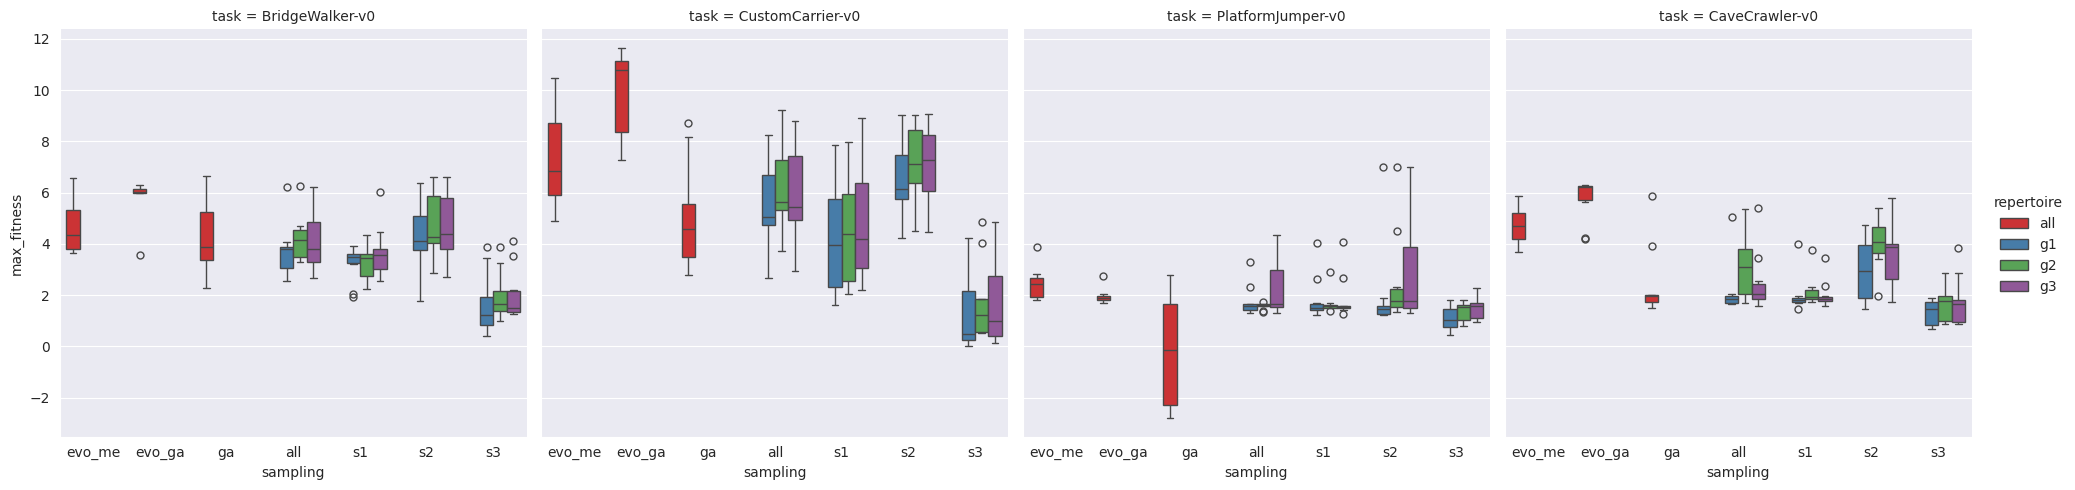

In [13]:
sns.catplot(df,
            x="sampling",
            y="max_fitness",
            col="task",
            col_wrap=4,
            hue="repertoire",
            palette="Set1",
            kind="box",
            )
plt.show()